Линейные модели, SVM и деревья решений


In [1]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [33]:
import graphviz
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC, SVC, LinearSVC
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz, plot_tree
from warnings import simplefilter

simplefilter('ignore')

In [3]:
df = pd.read_csv('./StudentsPerformance.csv', sep=',')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Выполним удаление пропусков, кодирование категориальных признаков

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df[['gender']])
df["race/ethnicity"] = le.fit_transform(df[['race/ethnicity']])
df["parental level of education"] = le.fit_transform(df[['parental level of education']])
df["lunch"] = le.fit_transform(df[['lunch']])
df["test preparation course"] = le.fit_transform(df[['test preparation course']])
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
6,0,1,4,1,0,88,95,92
7,1,1,4,0,1,40,43,39
8,1,3,2,0,0,64,64,67
9,0,1,2,0,1,38,60,50


In [8]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

В наборе нет пропуксов и категориальных значений
Выполним разделение данных 

In [9]:
y = df['writing score']
x = df.drop('writing score', axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
#функция, печатающая метрики
def print_metrics(y_test, y_pred):
    print(f"R^2_score: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

**Линейная модель (линейная регрессия)**

In [12]:
regr1 = LinearRegression().fit(x_train, y_train)
print_metrics(y_test, regr1.predict(x_test))

R^2_score: 0.9398965279464839
MSE: 14.091860057667382
MAE: 3.0034329985739596


При методе ближайших соседей с оптимальным k имели коэффициент детерминации ~0,90, то есть сейчас имеем результаты чуть лучше

**Метод SVM**

In [ ]:
clf1 = SVC().fit(x_train, y_train)
print_metrics(y_test, clf1.predict(x_test))

R^2_score: 0.6602618783587819
MSE: 79.655
MAE: 7.065


In [ ]:
clf2 = SVC(kernel='poly').fit(x_train, y_train)
print_metrics(y_test, clf2.predict(x_test))

R^2_score: 0.7832039580312207
MSE: 50.83
MAE: 5.43


In [ ]:
clf3 = NuSVC(kernel='linear', nu=0.01).fit(x_train, y_train)
print_metrics(y_test, clf3.predict(x_test))
#лучший результат

R^2_score: 0.8515951548238505
MSE: 34.795
MAE: 4.655


In [ ]:
clf4 = NuSVC(kernel='sigmoid', nu=0.01).fit(x_train, y_train)
print_metrics(y_test, clf4.predict(x_test))

R^2_score: 0.6169495862833745
MSE: 89.81
MAE: 7.77


In [ ]:
clf5 = LinearSVC(C=3, penalty='l1', dual=False, max_iter=10000).fit(x_train, y_train)
print_metrics(y_test, clf5.predict(x_test))

R^2_score: 0.6913332764650686
MSE: 72.37
MAE: 6.83


**Дерево решений**

In [23]:
tree1 = DecisionTreeRegressor(random_state=1).fit(x_train, y_train)
print_metrics(y_test, tree1.predict(x_test))

R^2_score: 0.865904631920157
MSE: 31.44
MAE: 4.54


In [25]:
def tree_info(tree):
  n_nodes = tree.tree_.node_count
  children_left = tree.tree_.children_left
  children_right = tree.tree_.children_right
  node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
  is_leaves = np.zeros(shape=n_nodes, dtype=bool)
  stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
  while len(stack) > 0:
      node_id, depth = stack.pop()
      node_depth[node_id] = depth
      is_split_node = children_left[node_id] != children_right[node_id]
      if is_split_node:
          stack.append((children_left[node_id], depth + 1))
          stack.append((children_right[node_id], depth + 1))
      else:
          is_leaves[node_id] = True
  print('Всего узлов: ', n_nodes )
  print('Глубина дерева: ', max(node_depth))
tree_info(tree1)


Всего узлов:  1409
Глубина дерева:  17


Попробуем подобрать оптимальный параметр max_depth для дерева

In [26]:
param_range = np.arange(1, 51, 2)
tree_parameters = [{'max_depth': param_range}]
gs1 = GridSearchCV(DecisionTreeRegressor(), tree_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs1.fit(x, y)
tree2 = gs1.best_estimator_
tree2

DecisionTreeRegressor(max_depth=5)

In [27]:
tree2.fit(x,y)
print_metrics(y_test, gs1.predict(x_test))

R^2_score: 0.9255030192995483
MSE: 17.46656209502791
MAE: 3.373568122599491


При глубине дерева 5 получили более высокий коэффициент детерминации и меньшие средние ошибки

In [29]:
tree_info(tree2)

Всего узлов:  63
Глубина дерева:  5


Вывод правил дерева

In [28]:
rules = export_text(tree2, feature_names=list(x.columns))
HTML('<pre>' + rules + '</pre>')

In [35]:
importances = pd.DataFrame(data=zip(x_train.columns, tree2.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

reading score: 0.987
test preparation course: 0.005
math score: 0.003
race/ethnicity: 0.003
parental level of education: 0.002
gender: 0.0
lunch: 0.0


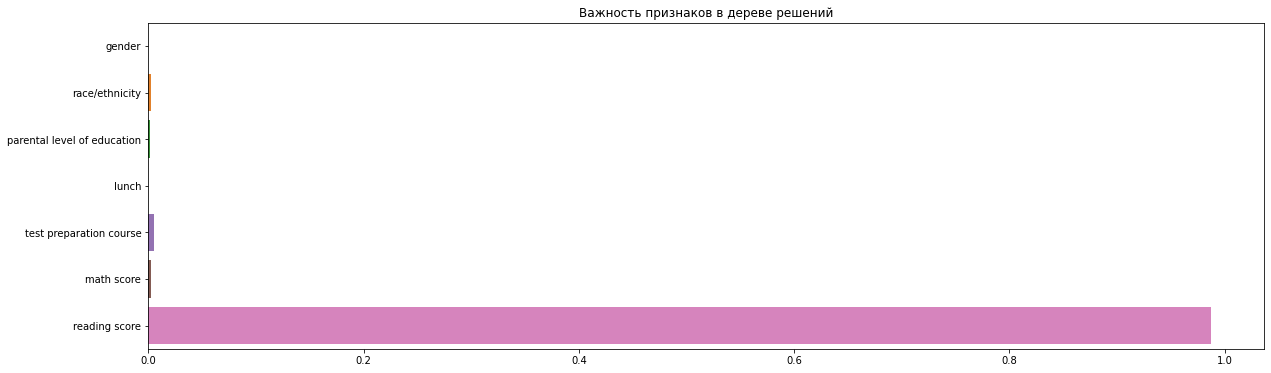

In [51]:
columns = x.columns
plt.figure(figsize=(20,6))
sns.barplot(x=tree2.feature_importances_, y=columns).set_title('Важность признаков в дереве решений')
plt.show()

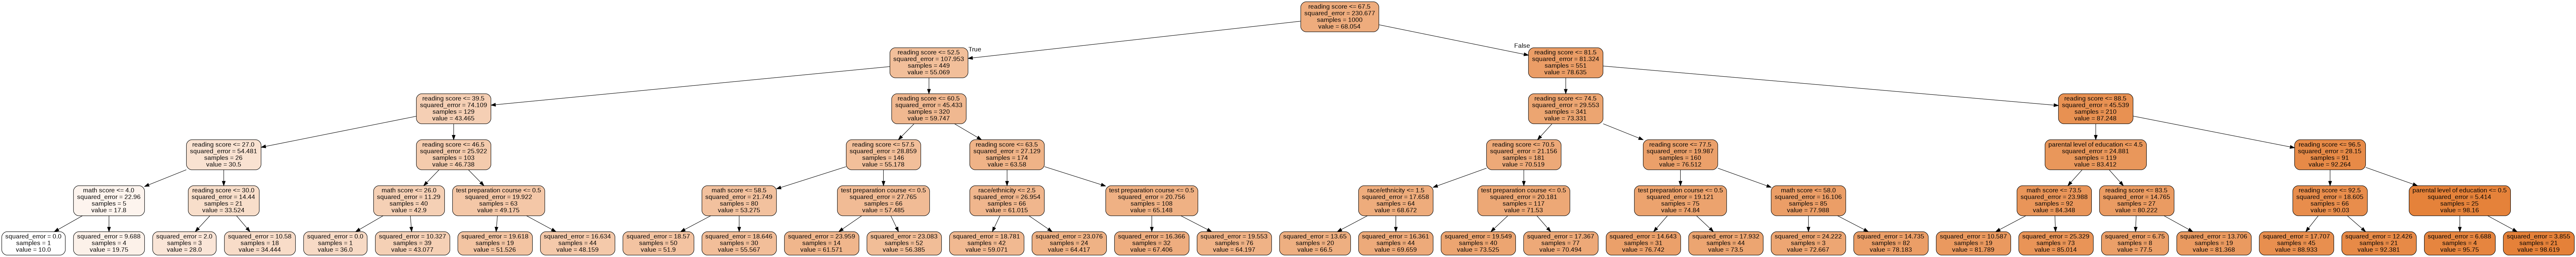

In [32]:
dot_data = export_graphviz(tree2, out_file='tree2.dot', feature_names=columns,
                                filled=True,
                                rounded=True)
!dot -Tpng tree2.dot -o tree2.png
Image(filename='tree2.png')